# Fourier Series 

We found in the tutorial that the Fourier series of 
\begin{equation}
    f(x) = 
    \begin{cases}
        0, -\pi < x < 0 \\
        1, 0 < x < \pi 
    \end{cases}
\end{equation}
was given by 
$$
    f(x) = \frac{1}{2} + \frac{2}{\pi} \sum_{n=0}^\infty \frac{\sin n x}{n}
$$
for odd $n$.
Let's plot this out and see what it looks like.

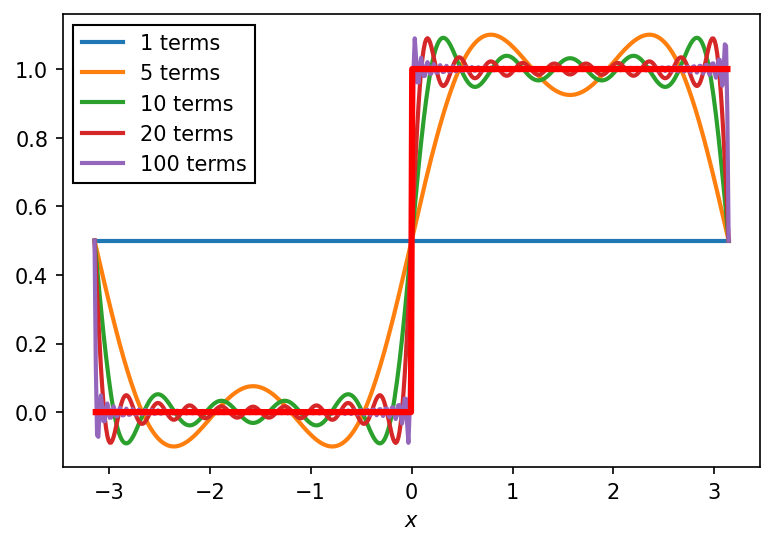

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

def f(x):
    if x > -np.pi and x < 0:
        return 0.0
    elif x > 0 and x < np.pi:
        return 1.0
    
def f_series(x, N):
    fv = 0.5*np.ones_like(x) ## a0
    for n in range(1, N, 2):
        fv += (2.0/np.pi) * np.sin(n * x) / n
    return fv

f=np.vectorize(f)

xv = np.linspace(-np.pi, np.pi,500)

plt.figure(dpi=150)

for N in [1, 5, 10, 20, 100]:
    plt.plot(xv, f_series(xv, N), lw=2, label="%i terms" %N)
plt.legend(fancybox=False, edgecolor="k", framealpha=1)
plt.xlabel("$x$")

plt.plot(xv, f(xv), 'r-', lw=3, label="$f(x)$")

plt.show()

We can see that as we include more terms, the approximation gets better however there is a "ringing" at the sharp edges of the step.  This is the Gibb's phenomena and occurs because we're trying to represent a discontinuous function with continuous functions, sine and cosine waves.

In the tutorial, we also found that
$$
    \frac{\pi^2}{6} = \sum_{n=1}^\infty \frac{1}{n^2} .
$$
Let's see how well this approximation converges.

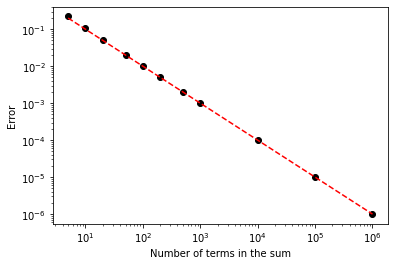

In [8]:
def approx(Nmax):
    a = 0.0
    for n in range(1, Nmax):
        a += 1.0/(n**2)
    return a
    
nvals = [5, 10, 20, 50, 100, 200, 500, 1000, 10000, 100000, 1000000]
plt.figure()
for n in nvals:
    error = np.abs( ( np.pi**2 / 6.0 ) - approx(n) )
    plt.loglog(n, error, 'ko')
plt.xlabel("Number of terms in the sum")
plt.ylabel("Error")
plt.loglog(np.array(nvals), 1/np.array(nvals), 'r--')
plt.show()

We can see that this summation converges to the correct value as $1/n$.